---
# <center> *Machine Learning*
## <center> Summer 2025, Week 1 (July 9th): Clustering
---

# Overview of Clustering in Machine Learning

Clustering is a type of **unsupervised learning** used to find hidden patterns or groupings in data **without labels**. The goal is to divide data into clusters where points in the same cluster are more similar to each other than to those in other clusters.

---

## Why Use Clustering?

- **Explore data** and reveal hidden structure
- **Summarize large datasets**
- **Preprocess data** for other algorithms (e.g. for classification or visualization)
- **Segment customers**, documents, images, or genetic data

---

## What Makes a “Good” Cluster?

A good clustering method creates groups where:
- Points in the same cluster are **close together** (high intra-cluster similarity)
- Points in different clusters are **far apart** (low inter-cluster similarity)

Different clustering methods define “similarity” in different ways — distance, density, connectivity, etc.

---

## Common Types of Clustering Methods

### 1. **Partition-Based Clustering**
Divides data into a fixed number of non-overlapping clusters.

- **Example**: K-Means
- **Assumption**: Clusters are roughly spherical and balanced in size
- **Strengths**: Fast, simple, scalable
- **Limitations**: Requires specifying the number of clusters (k)

---

### 2. **Hierarchical Clustering**
Builds a tree (or dendrogram) of clusters based on data similarity.

- **Two approaches**:
  - **Agglomerative**: Start with each point as its own cluster and merge them step by step.
  - **Divisive**: Start with all points in one cluster and split them recursively.

- **Strengths**: No need to choose k in advance; interpretable tree structure
- **Limitations**: Can be slow for large datasets

---

### 3. **Density-Based Clustering**
Forms clusters based on areas of high data density.

- **Example**: DBSCAN (Density-Based Spatial Clustering of Applications with Noise)
- **Strengths**: Can find arbitrarily shaped clusters; handles noise and outliers well
- **Limitations**: Sensitive to parameter choices; struggles with varying densities

---

### 4. **Model-Based Clustering**
Assumes data is generated from a mixture of probability distributions.

- **Example**: Gaussian Mixture Models (GMMs)
- **Strengths**: Captures complex shapes and overlapping clusters
- **Limitations**: Assumes a statistical model; may require many parameters

---

### 5. **Graph-Based and Spectral Clustering**
Uses graph theory and matrix operations to cluster data based on connectivity or similarity matrices.

- **Strengths**: Effective for non-convex and complex structures
- **Limitations**: Computationally expensive; sensitive to how the graph is constructed

---

## Choosing a Clustering Method

There’s no single best clustering algorithm. The right choice depends on:
- The shape and scale of your data
- Whether you know the number of clusters
- Whether your data has noise or outliers
- Your computational constraints

Clustering is an exploratory tool — try multiple methods and compare results visually and quantitatively.

---

In the next section, we’ll focus on one of the most widely used clustering methods: **K-Means**.


# Introduction to K-Means Clustering

K-Means is one of the most popular **unsupervised learning algorithms** in machine learning. It is used when we have data without labels and want to **discover structure** within it — typically by grouping similar data points together.

---

## What Does K-Means Do?

K-Means divides the data into **k distinct clusters**. Each cluster has a **center** (called a centroid), and the algorithm assigns each data point to the cluster with the **closest centroid**.

---

## Why Use It?

- To discover **natural groupings** in data
- To simplify and **summarize** large datasets
- As a preprocessing step for other algorithms

**Examples:**
- Grouping customers based on purchasing behavior
- Segmenting images into regions
- Organizing news articles by topic

---

## How the Algorithm Works

The K-Means algorithm follows these steps:

1. **Choose k** (the number of clusters).
2. **Initialize k centroids** randomly (or using a smarter method like K-Means++).
3. **Assign each data point** to the nearest centroid (based on distance, usually Euclidean).
4. **Update each centroid** to be the average of all points assigned to it.
5. Repeat steps 3–4 until:
   - Centroids no longer change (convergence), or
   - A maximum number of iterations is reached.

This is an iterative process that gradually improves the cluster assignments.

---

## Visual Intuition

Imagine dropping k magnets on a scatter plot of data. Each magnet pulls nearby points toward itself. As points group around magnets, the magnets move to the average position of the points they attract. This process repeats until the magnets stop moving.

---

## Limitations

- You must **choose k** ahead of time.
- Sensitive to **initialization** (can get stuck in local minima).
- Works best when clusters are roughly spherical and balanced in size.
- Can struggle with outliers and non-convex shapes.

---

## Choosing the Right k

There’s no universal rule, but some common methods include:

- **Elbow Method**: Plot the total within-cluster variance vs. k and look for the "elbow" point.
- **Silhouette Score**: Measures how similar a point is to its own cluster compared to others.

---

## Summary

- **Type**: Unsupervised learning
- **Goal**: Group data into k clusters based on similarity
- **Key Idea**: Minimize the distance between points and their cluster centroids

K-Means is fast, easy to implement, and surprisingly effective for many clustering tasks — making it a great starting point for understanding unsupervised learning.


In [7]:
import numpy as np 
import pandas as pd
import random 
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# font parameters dictionary
font = {'family' : 'serif',
        'weight' : 'bold',
        'size'   : 18,}


# figure parameters dictionary
figure = {"figsize" : (6,6),
          "dpi" : 120,
          "facecolor" : "w", 
          "edgecolor" : "k",}

# ticks settings
plt.rc('xtick',labelsize=10)
plt.rc('ytick',labelsize=10)

# axes setting
plt.rc('axes', titlesize=22, labelsize=18)     # fontsize of the axes title, labels

# Set the font parameters
plt.rc('font', **font) 

# Set the figure parameters 
plt.rc("figure", **figure)

## Step 1: Create Sample Data

We'll use a built-in function to create some fake 2D data that looks like it came from 3 different groups (clusters). You can imagine these clusters as three types of customers, or three different weather patterns, or anything else.


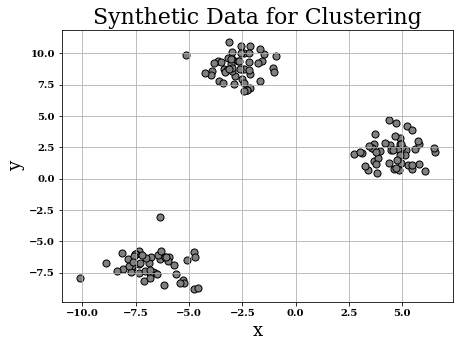

In [8]:
# Generate synthetic 2D data with 3 clusters
X, y_true = make_blobs(n_samples=150, centers=3, cluster_std=1.0, random_state=42)

# Save the data into a DataFrame for clarity
df = pd.DataFrame(X, columns=["x", "y"])
df["label"] = y_true

# Visualize the data without using the labels
plt.figure(figsize=(7, 5))
plt.scatter(df["x"], df["y"], c="gray", s=50, edgecolor='k')
plt.title("Synthetic Data for Clustering")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.show()


### What Did We Just Do?

- We created 150 points in 2D space.
- These points are loosely grouped around 3 different centers.
- We plotted them in gray to show that we don’t yet know which point belongs to which group — that’s what the algorithm will figure out.

Next, we’ll begin implementing the steps of the K-Means algorithm.


## Step 2: Initialize Centroids

K-Means begins by picking **k random points** as the initial centroids. These act as the starting guesses for the centers of our clusters.

In our case, we set `k = 3`, so we randomly select 3 points from the dataset as initial centroids.


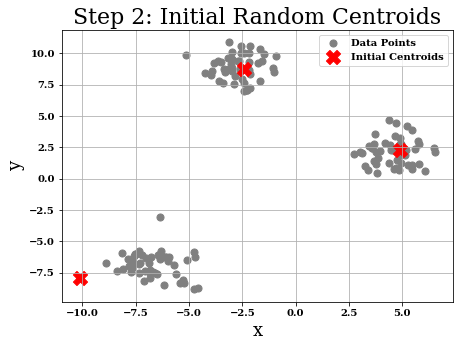

In [9]:
# Step 2: Randomly initialize k=3 centroids from the data points
np.random.seed(42)
k = 3
initial_centroid_indices = np.random.choice(len(X), k, replace=False)
centroids = X[initial_centroid_indices]

# Plot the data with the initial centroids
plt.figure(figsize=(7, 5))
plt.scatter(df["x"], df["y"], c="gray", s=50, label='Data Points')
plt.scatter(centroids[:, 0], centroids[:, 1], c="red", s=200, marker='X', label='Initial Centroids')
plt.title("Step 2: Initial Random Centroids")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()

### What Did We Just Do?

- We randomly picked 3 points from the dataset to serve as our starting centroids.
- These red Xs will act as the "centers" of our clusters — for now.
- In the next step, we'll assign every other point to the **closest** centroid.


## Step 3: Assign Each Point to the Nearest Centroid

Now that we have our initial centroids, we assign each data point to the **closest centroid**. This step forms the first version of the clusters.

We use a distance function to measure how far each point is from each centroid. The most common distance used is **Euclidean distance** (straight-line distance).


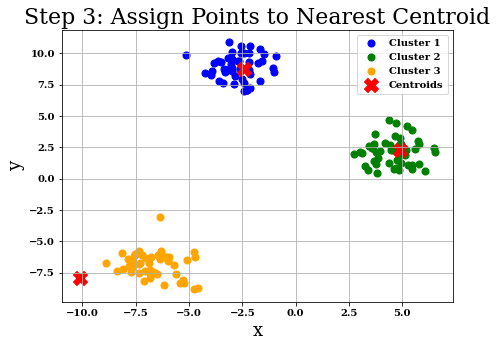

In [11]:
from scipy.spatial.distance import cdist

# Step 3: Assign each point to the nearest centroid
# We compute the distance from every point to each centroid
distances = cdist(X, centroids)  # shape: (150 points, 3 centroids)
labels = np.argmin(distances, axis=1)  # assign each point to the nearest centroid

# Plot the data points colored by cluster assignment
plt.figure(figsize=(7, 5))
colors = ['blue', 'green', 'orange']
for i in range(k):
    plt.scatter(X[labels == i, 0], X[labels == i, 1], s=50, c=colors[i], label=f'Cluster {i+1}')
plt.scatter(centroids[:, 0], centroids[:, 1], c="red", s=200, marker='X', label='Centroids')
plt.title("Step 3: Assign Points to Nearest Centroid")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()



### What Did We Just Do?

- We calculated the distance from each point to every centroid.
- Each point was assigned to the **nearest** centroid.
- The result is 3 colored groups — these are our **initial clusters**.
- Notice that some clusters may be large or oddly shaped — that's okay for now.

Next, we’ll **update the centroids** based on these new assignments.


## Step 4: Update the Centroids

After assigning each point to a cluster, we update the position of each centroid.  
The new centroid is simply the **average (mean)** of all points currently assigned to that cluster.

This step pulls the centroid closer to the center of its group.


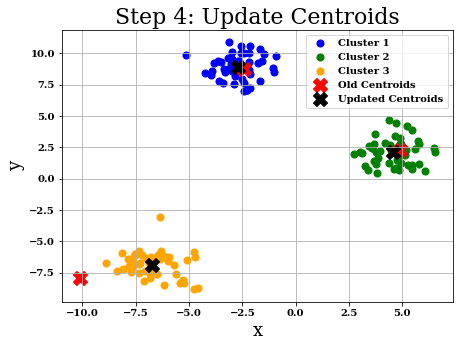

In [12]:
# Step 4: Update the centroids by computing the mean of points in each cluster
new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(k)])

# Plot the updated centroids alongside the old ones
plt.figure(figsize=(7, 5))
for i in range(k):
    plt.scatter(X[labels == i, 0], X[labels == i, 1], s=50, c=colors[i], label=f'Cluster {i+1}')
plt.scatter(centroids[:, 0], centroids[:, 1], c="red", s=200, marker='X', label='Old Centroids')
plt.scatter(new_centroids[:, 0], new_centroids[:, 1], c="black", s=200, marker='X', label='Updated Centroids')
plt.title("Step 4: Update Centroids")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()

### What Did We Just Do?

- For each cluster, we calculated the **average position** of the points assigned to it.
- We moved the centroid to this new average position.
- Red Xs show the old centroids; black Xs show the updated ones.

The algorithm now repeats steps 3 and 4:
1. Assign each point to the nearest **updated** centroid
2. Recompute the centroids

This continues until the centroids stop changing — meaning the clusters have stabilized.

In the next step, we’ll repeat this process in a loop.


## Step 5: Repeat Until Convergence

We now **repeat the process**:
1. Assign each point to the nearest centroid
2. Update the centroids based on the new assignments

We continue until the centroids stop changing — meaning the clusters have become stable. This is called **convergence**.

We’ll also add a maximum number of iterations just in case convergence takes too long.

Converged after 2 iterations.


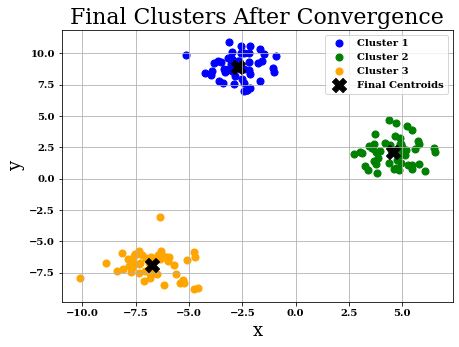

In [14]:
# Step 5: Repeat Steps 3 and 4 until centroids do not change
centroids = centroids.copy()
tolerance = 1e-4  # how close is "close enough"
max_iter = 10     # safety stop

for iteration in range(max_iter):
    # Assign points to nearest centroid
    distances = cdist(X, centroids)
    labels = np.argmin(distances, axis=1)
    
    # Calculate new centroids
    new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(k)])
    
    # Check if centroids have stopped changing
    if np.all(np.abs(new_centroids - centroids) < tolerance):
        print(f"Converged after {iteration+1} iterations.")
        break
    
    centroids = new_centroids

# Final visualization
plt.figure(figsize=(7, 5))
for i in range(k):
    plt.scatter(X[labels == i, 0], X[labels == i, 1], s=50, c=colors[i], label=f'Cluster {i+1}')
plt.scatter(centroids[:, 0], centroids[:, 1], c="black", s=200, marker='X', label='Final Centroids')
plt.title("Final Clusters After Convergence")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()

### Final Result

- The algorithm automatically grouped the points into 3 clusters.
- It adjusted the centroids step by step until the solution stabilized.
- The final black Xs are the cluster centers.

You now understand how K-Means clustering works:
- Start with random centroids
- Assign points to the nearest centroid
- Recompute centroids
- Repeat until centroids don't move

This is the foundation of many real-world applications in customer segmentation, image compression, and more.


## How to Choose k? Use the Elbow Method

Before we run K-Means, we need to choose how many clusters (`k`) to use.

One common method is the **Elbow Method**:
- Run KMeans for a range of values (e.g. k = 1 to 10)
- For each value of k, compute the **inertia** — a measure of how tight the clusters are
- Plot the inertia vs. k
- Look for a point where the decrease in inertia slows down — like an "elbow" in the curve
- That point is often a good choice for k

Inertia is automatically computed by scikit-learn’s `KMeans` model using `.inertia_`.


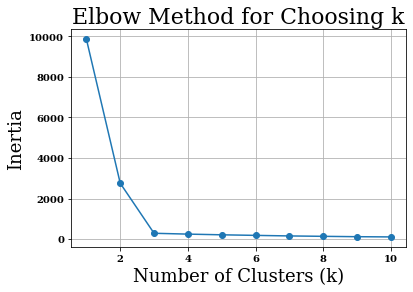

In [16]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Try k from 1 to 10
inertias = []
k_values = range(1, 11)

for k in k_values:
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(X)
    inertias.append(model.inertia_)

# Plot the elbow curve
plt.figure(figsize=(6, 4))
plt.plot(k_values, inertias, marker='o')
plt.title("Elbow Method for Choosing k")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.grid(True)
plt.show()


---

# Exercise: Use Scikit-Learn's Built-In KMeans

Now that you’ve gone through the inner workings of K-Means, it's time to use a built-in library to do the same task — faster and with less code.

In this exercise, you'll use the `KMeans` class from the popular machine learning library **scikit-learn** to cluster the same dataset.

---

### 📚 Resources
- [Scikit-Learn KMeans Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)
- [KMeans User Guide](https://scikit-learn.org/stable/modules/clustering.html#k-means)

Fill in the blanks in the code cells below and run them. Check the comments for hints.


In [ ]:
# TODO: Import KMeans from sklearn.cluster
# Hint: You’ve done similar imports before!

from sklearn.cluster import _____  # ← fill in here

### Step 1: Create the KMeans model

Now we’ll create a KMeans model with k=3 clusters.
Set `random_state=42` so we get the same result every time we run it.


In [ ]:
# TODO: Create a KMeans model with 3 clusters
# Hint: Use the KMeans class with n_clusters=3 and random_state=42

kmeans = KMeans(_____)  # ← fill in here

### Step 2: Fit the model to the data

Use the `.fit()` method to train the model on the dataset `X`.
This is where the algorithm runs the same loop (assign + update) we coded before.


In [ ]:
# TODO: Fit the KMeans model on X
# Hint: This is just like calling `.fit()` in other sklearn models

kmeans._____  # ← fill in here

### Step 3: Check the cluster assignments

The model has now clustered the data. Let's check what label it assigned to each point using `.labels_`.

Then we’ll plot the results.


In [ ]:
# TODO: Access the labels (cluster assignments) from the model
labels = kmeans._____  # ← fill in here

# Plot the clustered points
plt.figure(figsize=(7, 5))
for i in range(3):
    plt.scatter(X[labels == i, 0], X[labels == i, 1], s=50, label=f'Cluster {i+1}')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='black', s=200, marker='X', label='Centroids')
plt.title("KMeans Clustering Using Scikit-Learn")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()

### ✅ Well Done!

You just:
- Created a KMeans model with scikit-learn
- Fit it to the data
- Retrieved the predicted clusters and centroids
- Visualized the results

This was **exactly the same process** you manually coded earlier — only now it’s compact and reusable.

Try adjusting `n_clusters` or using different datasets next time!

If you want to go further, check out:
- `.predict()` method: Predict the cluster of new unseen points
- `.inertia_`: A measure of how tightly the clusters are grouped
- `.fit_predict()`: Combines `.fit()` and `.predict()` into one step


## Summary: How K-Means Works (In 4 Steps)

1. **Choose k**: Pick the number of clusters you want.
2. **Initialize**: Randomly select k points as starting centroids.
3. **Assign**: Assign each data point to the nearest centroid.
4. **Update**: Move each centroid to the average of its assigned points.

Repeat steps 3 and 4 until the centroids stop changing.``` 